# EDA Germany 

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, time, datetime

In [4]:
#Create dataframe from CSV
df = pd.read_csv("../data/fromAPI/cleaned_hourly_all.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370589 entries, 0 to 1370588
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1370589 non-null  object 
 1   train                  1210176 non-null  object 
 2   path                   1241603 non-null  object 
 3   eva_nr                 1370589 non-null  int64  
 4   category               1370589 non-null  int64  
 5   name                   1370589 non-null  object 
 6   state                  1370589 non-null  object 
 7   city                   1370589 non-null  object 
 8   zip                    1370589 non-null  int64  
 9   long                   1370589 non-null  float64
 10  lat                    1370589 non-null  float64
 11  arrival_plan           1241603 non-null  object 
 12  departure_plan         1248748 non-null  object 
 13  arrival_change         1067865 non-null  object 
 14  departure_change  

In [6]:
df.describe()

,eva_nr,category,zip,long,lat,arrival_delay_m,depature_delay_m,hour
count,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06
mean,8.017032e+06,3.738845e+00,4.667255e+04,1.014320e+01,5.087310e+01,1.674416e+00,1.532929e+00,5.084408e+01
std,3.081238e+04,1.124022e+00,2.818814e+04,2.258215e+00,1.787852e+00,5.483013e+00,5.161999e+00,2.883852e+01
min,8.000001e+06,1.000000e+00,1.067000e+03,6.070715e+00,4.741103e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000962e+06,3.000000e+00,2.009700e+04,8.468921e+00,4.934955e+01,0.000000e+00,0.000000e+00,2.400000e+01
50%,8.004112e+06,4.000000e+00,4.726900e+04,9.910778e+00,5.105617e+01,0.000000e+00,0.000000e+00,5.100000e+01
75%,8.010134e+06,5.000000e+00,7.103400e+04,1.198709e+01,5.247097e+01,1.000000e+00,1.000000e+00,7.500000e+01
max,8.098360e+06,5.000000e+00,9.997400e+04,1.497908e+01,5.490684e+01,3.920000e+02,3.960000e+02,9.800000e+01


In [7]:
df.head()

,ID,train,path,eva_nr,category,name,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,depature_delay_m,hour,arrival_delay_check,departure_delay_check
0,4083473720689476753-2406231250-4,20,Stolberg(Rheinl)Hbf|Eilendorf|Aachen-Rothe Erde,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-23 13:01:00,2024-06-23 13:02:00,2024-06-23 13:03:00,2024-06-23 13:04:00,2,2,0,on_time,on_time
1,-8892239479013746475-2406231212-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-23 13:00:00,2024-06-23 13:01:00,2024-06-23 13:05:00,2024-06-23 13:06:00,5,5,0,on_time,on_time
2,3772983581833112391-2406231337-1,33,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,NaN,2024-06-23 13:37:00,NaN,NaN,0,0,0,on_time,on_time
3,-7760689325071259199-2406231337-1,29,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,NaN,2024-06-23 13:37:00,NaN,NaN,0,0,0,on_time,on_time
4,3762663024269879642-2406231318-1,9,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,NaN,2024-06-23 13:18:00,NaN,2024-06-23 13:18:00,0,0,0,on_time,on_time


In [8]:
df.groupby("state").count().sort_values(by="ID", ascending=False)

,ID,train,path,eva_nr,category,name,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,depature_delay_m,hour,arrival_delay_check,departure_delay_check
state,,,,,,,,,,,,,,,,,,,
Nordrhein-Westfalen,230356,202295,209131,230356,230356,230356,230356,230356,230356,230356,209131,210482,185450,181811,230356,230356,230356,230356,230356
Bayern,214624,191009,194792,214624,214624,214624,214624,214624,214624,214624,194792,195904,181712,179565,214624,214624,214624,214624,214624
Berlin,207731,197424,200228,207731,207731,207731,207731,207731,207731,207731,200228,200341,154230,150437,207731,207731,207731,207731,207731
Baden-Württemberg,177647,153345,157911,177647,177647,177647,177647,177647,177647,177647,157911,158858,143448,140745,177647,177647,177647,177647,177647
Hessen,132226,116935,120397,132226,132226,132226,132226,132226,132226,132226,120397,120951,107176,105442,132226,132226,132226,132226,132226
Hamburg,96561,89601,91402,96561,96561,96561,96561,96561,96561,96561,91402,91692,53285,50698,96561,96561,96561,96561,96561
Niedersachsen,59883,48469,51971,59883,59883,59883,59883,59883,59883,59883,51971,52270,50026,49536,59883,59883,59883,59883,59883
Sachsen,55808,49220,49963,55808,55808,55808,55808,55808,55808,55808,49963,50539,46187,45540,55808,55808,55808,55808,55808
Rheinland-Pfalz,52719,46269,46696,52719,52719,52719,52719,52719,52719,52719,46696,47152,42623,41812,52719,52719,52719,52719,52719


In [26]:
states = df.groupby("state").sum("arrival_delay_m").sort_values(by="arrival_delay_m", ascending=False)
df_states = pd.DataFrame(states)

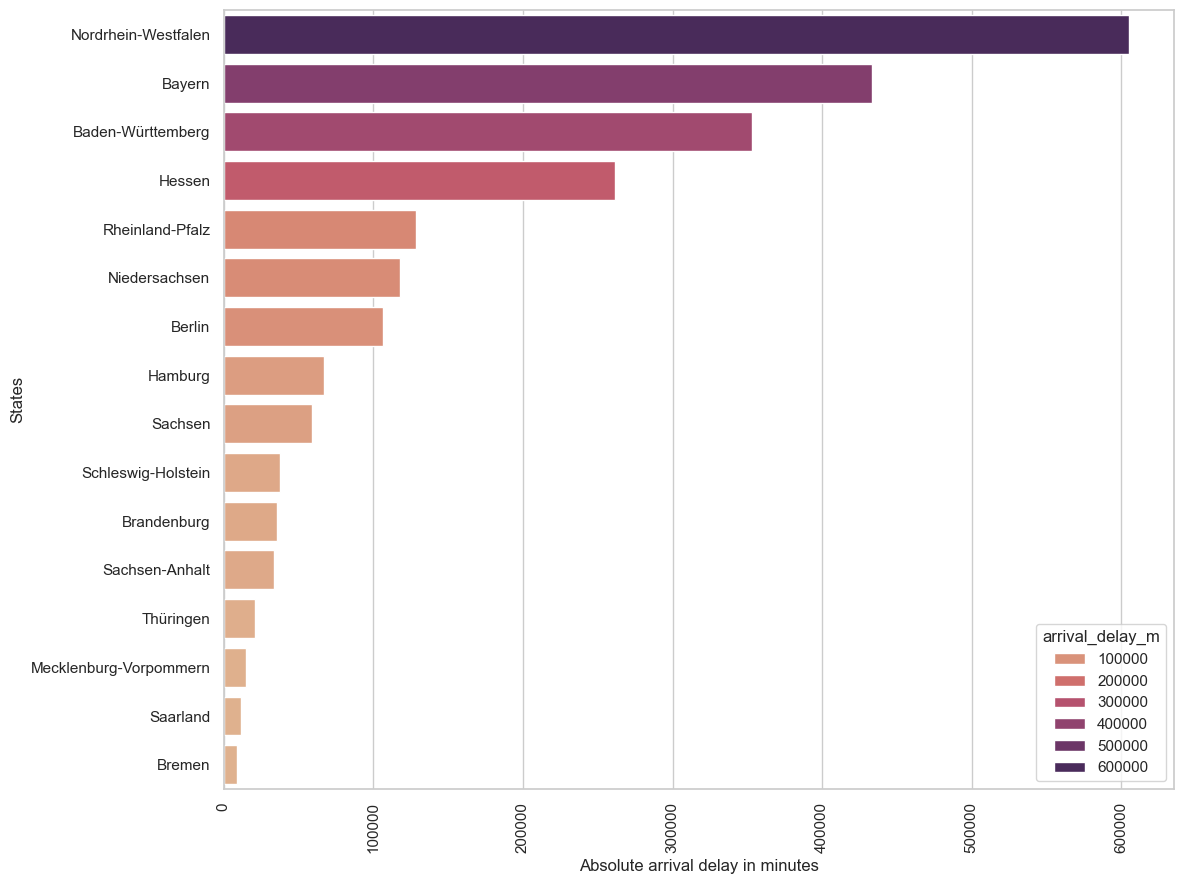

In [27]:
sns.set_theme(rc={'figure.figsize':(12,9)})
sns.set_theme(style="whitegrid")


ax = sns.barplot(x="arrival_delay_m", y="state", data=df_states, palette="flare", hue="arrival_delay_m", orient="h")

plt.xticks(rotation=90)
plt.xlabel("Absolute arrival delay in minutes")
plt.ylabel("States")

plt.tight_layout()
plt.show()

In [32]:
df_states

,eva_nr,category,zip,long,lat,arrival_delay_m,depature_delay_m,hour
state,,,,,,,,
Nordrhein-Westfalen,1843407349711,823140,10813554064,1.640118e+06,1.181211e+07,604916,548839,11764079
Bayern,1717636109148,791196,18345242148,2.435418e+06,1.041716e+07,433104,396724,10908722
Baden-Württemberg,1421704384587,647114,13155882525,1.589690e+06,8.656511e+06,352916,328512,9117704
Hessen,1058821610647,494383,7701071844,1.153307e+06,6.639923e+06,261870,248325,6765097
Rheinland-Pfalz,421858349280,203841,3203295198,4.116725e+05,2.628175e+06,128270,120732,2668803
Niedersachsen,479335601637,218673,1919914757,5.697807e+05,3.145336e+06,117552,105883,3029802
Berlin,1678865503551,809820,2471185393,2.782385e+06,1.090706e+07,106415,97380,10450351
Hamburg,772963237092,358341,2081074604,9.639510e+05,5.171256e+06,67284,56090,4914928
Sachsen,447110390293,230122,201629698,7.321723e+05,2.854057e+06,58900,54747,2840299


KeyError: 'state'

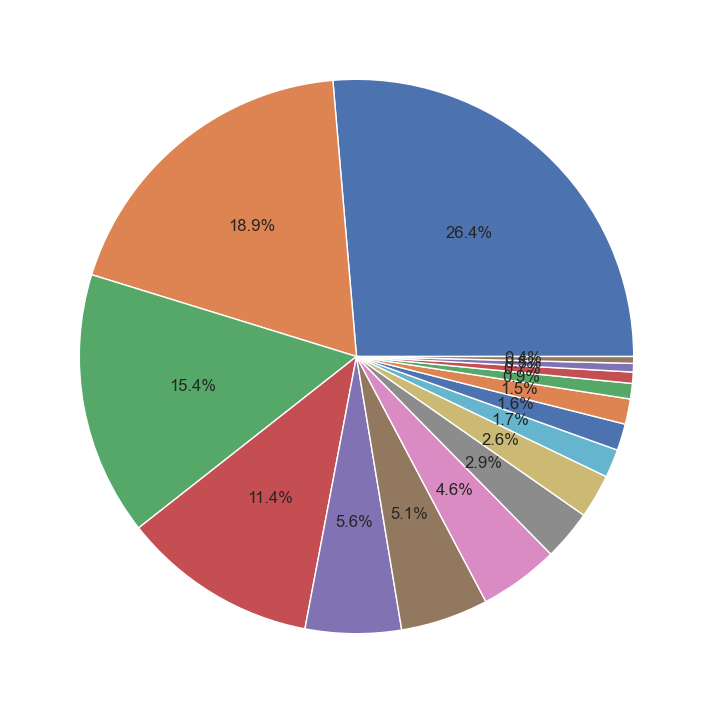

In [31]:
plt.pie(data=df_states, x="arrival_delay_m", autopct="%1.1f%%")
#plt.ylabel(df_states["state"])

#fig, ax = plt.subplots()
#ax.pie(df_states["arrival_delay_m"], autopct="%1.1f%%")
plt.legend(data = df_states["state"], title="States")
plt.show

In [12]:
states_relativ = (df_states["arrival_delay_m"] / 1370589) * 100
df_states_rel = pd.DataFrame(states_relativ)

In [13]:
df_states_rel

,arrival_delay_m
state,
Nordrhein-Westfalen,44.135478
Bayern,31.599845
Baden-Württemberg,25.749222
Hessen,19.106384
Rheinland-Pfalz,9.358750
Niedersachsen,8.576751
Berlin,7.764180
Hamburg,4.909130
Sachsen,4.297422


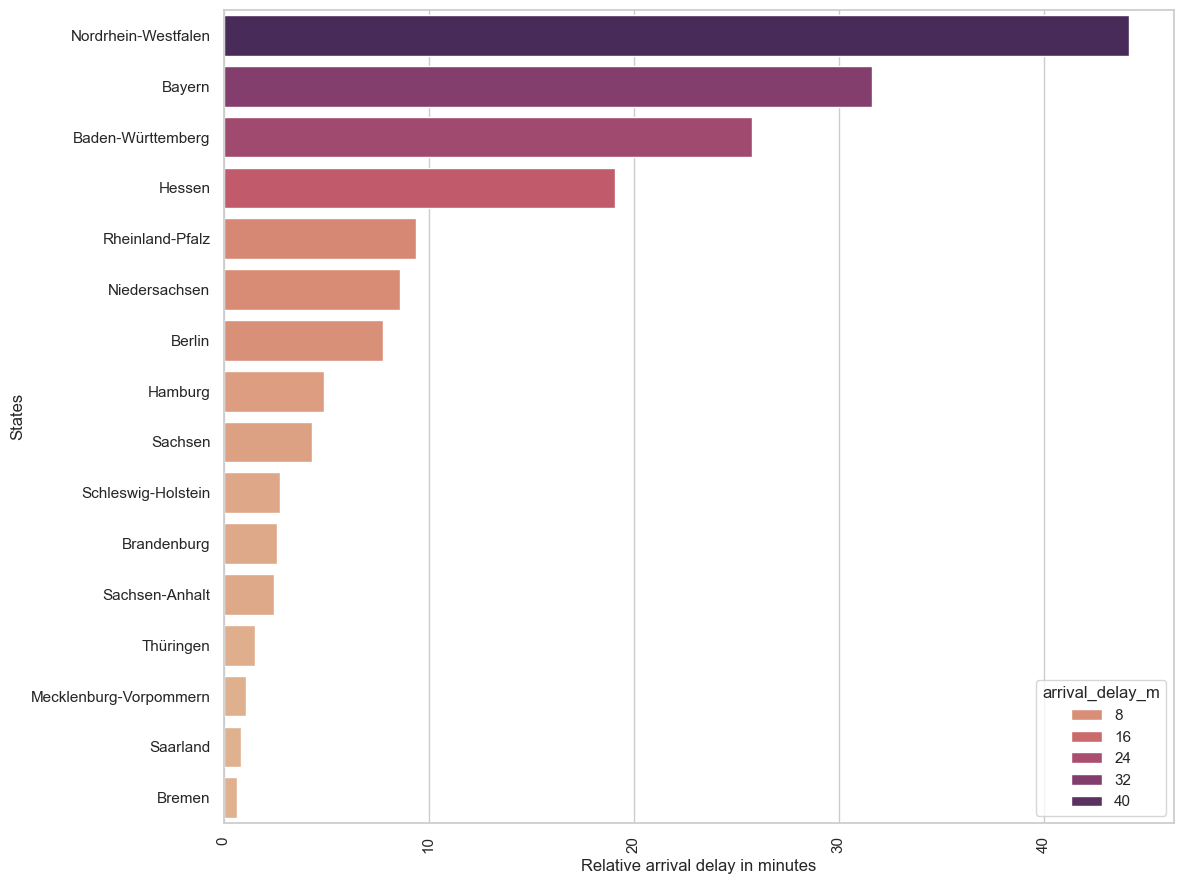

In [20]:
sns.set_theme(rc={'figure.figsize':(12,9)})
sns.set_theme(style="whitegrid")


ax = sns.barplot(data=df_states_rel, x="arrival_delay_m", y="state", palette="flare", hue="arrival_delay_m", orient="h")

plt.xticks(rotation=90)
plt.xlabel("Relative arrival delay in minutes")
plt.ylabel("States")

plt.tight_layout()
plt.show()